# Raport z zadania uczenie (się) ze wzmocnieniem
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
import gymnasium as gym
import pandas as pd
from experiment import experiment, visualize, plot_results

# Trening
- Algorytm jest trenowany z różnymi parametrami learning rate, discount factor, exploration probability oraz max_episode steps. 
- Ewaluacja ma miejsce co 1000 epizodów treningowych i polega na wykonaniu 100 epizodów bez aktualizacji tabeli Q, zliczając przy tym sumę wszystkich nagród oraz sumę kroków potrzebnych do zakończenia epizodu, obydwa podzielone na liczbę epizodów (100). 
- Wyniki porównywane są na podstawie sumy nagród oraz średniej liczby kroków po ostatniej ewaluacji (po 10000 epizodów).
- Exploration probability posiada decay rate równy 0.8. Aktualizowana jest co 1000 epizodów.

In [2]:
env = gym.make("Taxi-v3", render_mode='rgb_array').env
LEARNING_RATES = [0.8, 0.9, 0.95, 0.8, 0.9, 0.95, 0.8, 0.9, 0.95]
DISCOUNT_FACTORS = [0.5, 0.6, 0.7, 0.7, 0.6, 0.5, 0.5, 0.6, 0.7]
EXPLORATION_PROBABILITY = [0.1, 0.3, 0.4, 0.4, 0.3, 0.1, 0.1, 0.3, 0.4]
MAX_EPISODE_STEPS = [100, 100, 100, 150, 150, 150, 200, 200, 200]
NUMBER_EPISODES = [10001 for _ in range(9)]
results, best_model_training, best_q_table = experiment(env, LEARNING_RATES, DISCOUNT_FACTORS, EXPLORATION_PROBABILITY, MAX_EPISODE_STEPS, NUMBER_EPISODES)
df = pd.DataFrame(results)
df

,Number of episodes,Learning rate,Discount factor,Exploration probability,Max episode steps,Final reward,Final steps number
0,10001,0.80,0.5,0.1,100,8.17,12.83
1,10001,0.90,0.6,0.3,100,8.08,12.92
2,10001,0.95,0.7,0.4,100,7.86,13.14
3,10001,0.80,0.7,0.4,150,8.02,12.98
4,10001,0.90,0.6,0.3,150,7.99,13.01
5,10001,0.95,0.5,0.1,150,7.60,13.40
6,10001,0.80,0.5,0.1,200,8.09,12.91
7,10001,0.90,0.6,0.3,200,7.87,13.13
8,10001,0.95,0.7,0.4,200,7.38,13.62


## Przebieg treningu dla najlepszego modelu

In [3]:
df2 = pd.DataFrame(best_model_training)
df2

,Episode_number,Average_reward,Average_steps_per_episode
0,0,-109.00,100.00
1,1000,-3.60,22.29
2,2000,5.84,14.74
3,3000,7.92,13.08
4,4000,7.87,13.13
5,5000,7.88,13.12
6,6000,8.26,12.74
7,7000,8.14,12.86
8,8000,8.01,12.99
9,9000,7.77,13.23


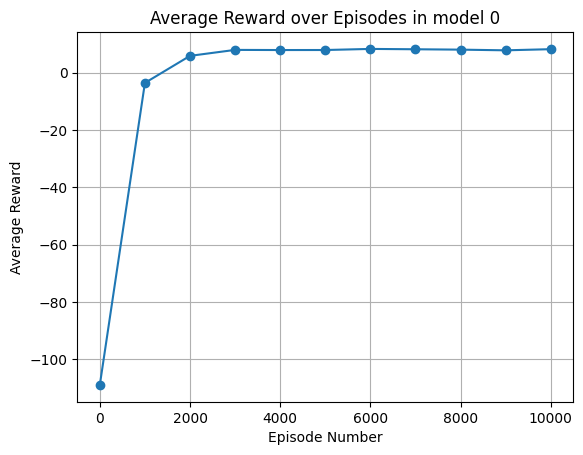

In [4]:
plot_results(best_model_training, 0)

## Wizualizacja działania algorytmu dla 5 epizodów

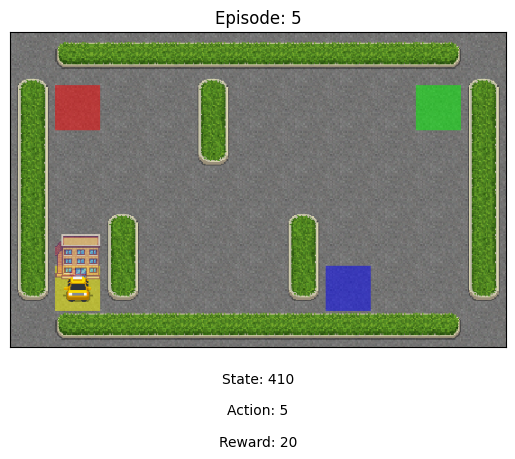

In [5]:
visualize(env, best_q_table, 5)

# Wyniki
- Najlepszy wynik został osiągnięty przez model 0 z learning rate 0.8, discount_factor 0.5, exploration probability 0.1, max episode steps 100.
- Najgorszy wynik został osiągnięty przez model 9 z learning rate 0.95, discount_factor 0.7, exploration probability 0.4, max episode steps 200.
- Wszystkie modele osiągnęły wyniki nagrody w przedziale (7.3; 8.2) oraz liczby kroków w przedziale (12.8; 13.7)
# Wnioski
- Zwiększenie prawdopodobieństwa eksploracji nie wpływało pozytywnie na wynik. Oznacza to, że w tym środowisku szybko osiągamy optymalne rozwiązanie.
- Dla zadanego środowiska algorytm osiąga najlepsze wyniki po około 3000 epizodów, następnie wyniki wahają się w granicach (7.8; 8.3). Oznacza to, że agent znalazł optymalne rozwiązanie i nie jest w stanie bardziej go ulepszyć, więc wyniki zależne są od wylosowanej pozycji startowej (-1 punkt za każdy krok).
- Algorytm działa bardzo szybko, wytrenowanie agenta dla 10000 epizodów zajmuje kilkanaście sekund.